In [2]:
# Celda 1: Importar Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re # Para expresiones regulares en NLP

# Configuración de visualización (opcional)
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [3]:
# Celda 2: Cargar el Dataset
try:
    df = pd.read_csv('datasetTexto.csv')
    # Conversión de Fecha
    df['Fecha'] = pd.to_datetime(df['Fecha'])
    print("Dataset cargado y fecha convertida.")
except FileNotFoundError:
    print("Error: Asegúrate de que el archivo 'analisis_temas.csv' esté en la misma carpeta.")

Dataset cargado y fecha convertida.


In [4]:
df

,ID,Categoria,Titulo,Medio,Fecha,Resumen,Comentario_Reaccion
0,1,Generacion Z,Gen Z-styled protests spread in Mexico,Reuters,2025-11-16,Protestas tras asesinato de alcalde; enfrentam...,"Jóvenes exigen seguridad, no sólo retórica pol..."
1,2,Frankenstein,Frankenstein ya en streaming,Netflix Tudum,2025-11-07,La película se estrena en Netflix; estructura ...,La versión de Del Toro es increíblemente emoti...
2,3,Generacion Z,Sheinbaum desautoriza marcha de la generación Z,El País,2025-11-17,Gobierno señala baja participación juvenil y p...,"Dicen que somos pocos, pero el ruido que hacem..."
3,4,Frankenstein,Del Toro visita CDMX por estreno,Milenio,2025-10-30,Del Toro y elenco asistirán a evento en Ciudad...,"Necesito ir a la alfombra roja, GDT es un ídol..."
4,5,Generacion Z,Gobierno vincula marcha con desinformación,El País,2025-11-13,Acusan campaña digital financiada con bots e i...,Siempre es más fácil culpar a los bots que esc...
...,...,...,...,...,...,...,...
195,196,Frankenstein,"Del Toro: ""Es una tragedia sobre la paternidad...",Focus Features,2025-11-05,El director se enfoca en la responsabilidad de...,Un tema universal que Del Toro maneja con maes...
196,197,Generacion Z,Las 'Fake News' sobre la marcha: Desmentidos d...,VerificadorMx,2025-11-15,Jóvenes usan sus redes para desmentir rumores ...,La Gen Z lucha contra la desinformación en tie...
197,198,Frankenstein,Frankenstein se proyecta en la Cineteca Nacional,Cineteca Agenda,2025-10-28,Función especial con presencia de críticos.,Un evento cultural imperdible en la Cineteca.
198,199,Generacion Z,Impacto en la cultura pop: Músicos se unen a l...,Rolling Stone MX,2025-11-17,Bandas de rock y rap se pronuncian y donan fon...,Los artistas son aliados del cambio.


In [6]:
df['Medio'].value_counts()

El País           12
Milenio            6
Reuters            4
El Universal       4
El Financiero      4
                  ..
INAH               2
FilmeNow           2
VICE News          2
Collider           2
Twitter Debate     2
Name: Medio, Length: 90, dtype: int64

### Análisis Temporal y Visualización de la Cobertura (Celda 4)
Analizaremos la intensidad de la cobertura noticiosa simulada a lo largo del tiempo, combinando ambos temas.

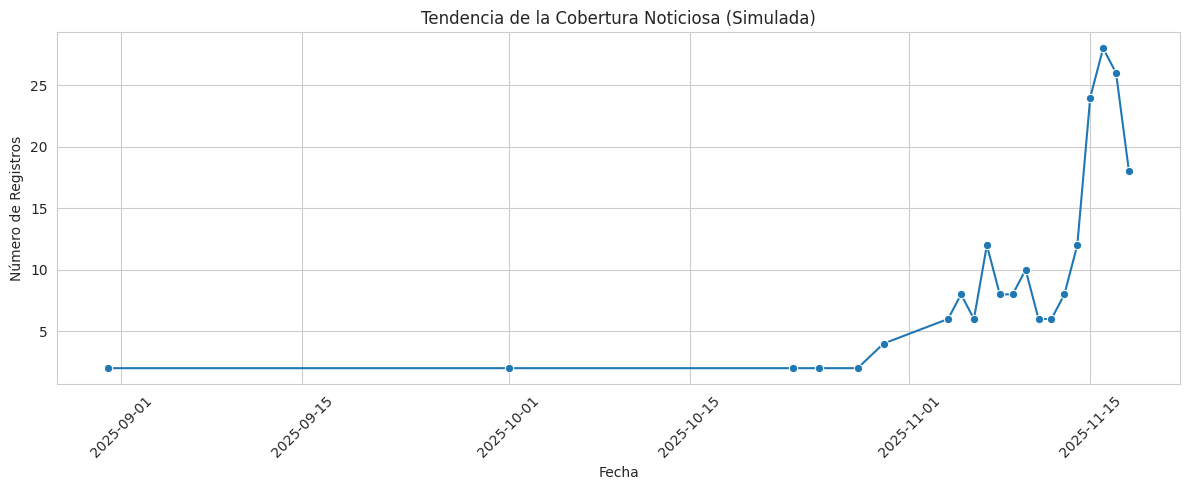


--- Conteo por Día de la Semana ---
 Monday       36
Tuesday      32
Wednesday    16
Thursday     20
Friday       24
Saturday     34
Sunday       38
Name: Dia_Semana, dtype: int64


In [7]:
# Celda 4: Análisis Temporal
# 1. Agrupar el conteo de registros por día
cobertura_diaria = df.groupby(df['Fecha'].dt.date)['ID'].count().reset_index()
cobertura_diaria.columns = ['Fecha', 'Conteo']

# 2. Visualización: Cobertura de la Noticia por Día 
#[Image of a line chart showing daily news coverage count over time]

plt.figure(figsize=(12, 5))
sns.lineplot(data=cobertura_diaria, x='Fecha', y='Conteo', marker='o')
plt.title('Tendencia de la Cobertura Noticiosa (Simulada)')
plt.xlabel('Fecha')
plt.ylabel('Número de Registros')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 3. Cobertura por Día de la Semana
df['Dia_Semana'] = df['Fecha'].dt.day_name()
conteo_dias = df['Dia_Semana'].value_counts().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).fillna(0)
print("\n--- Conteo por Día de la Semana ---\n", conteo_dias)

### Procesamiento Básico de Lenguaje Natural (NLP) (Celdas 5-6)

Para entender mejor las narrativas, extraemos las palabras más frecuentes en los comentarios de cada categoría.

In [8]:
# Celda 5: Top Palabras Clave (Generación Z)
# 1. Filtrar el texto y combinar Comentarios/Resúmenes de Gen Z
texto_genz = ' '.join(df[df['Categoria'] == 'Generacion Z']['Comentario_Reaccion'].astype(str) + ' ' +
                      df[df['Categoria'] == 'Generacion Z']['Resumen'].astype(str))

# 2. Tokenización y limpieza básica (remover puntuación y números)
texto_limpio = re.sub(r'[^\w\s]', '', texto_genz.lower())
palabras = texto_limpio.split()

# 3. Definir Stopwords (palabras comunes que no añaden valor)
stopwords_es = set(['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'un', 'una', 'con', 'es', 'del', 'por', 'se', 'las', 'más', 'su', 'sus', 'no', 'para', 'como', 'tras', 'tras', 'entre', 'sobre', 'al'])

# 4. Conteo de Palabras
from collections import Counter
conteo_palabras = Counter(p for p in palabras if p not in stopwords_es and len(p) > 3)

print("--- Top 10 Palabras Clave en Comentarios Gen Z ---\n", conteo_palabras.most_common(10))

--- Top 10 Palabras Clave en Comentarios Gen Z ---
 [('jóvenes', 15), ('protestas', 13), ('protesta', 9), ('juvenil', 7), ('calle', 7), ('movimiento', 7), ('política', 6), ('digital', 6), ('falta', 6), ('real', 6)]


In [9]:
# Celda 6: Top Palabras Clave (Frankenstein)
texto_frank = ' '.join(df[df['Categoria'] == 'Frankenstein']['Comentario_Reaccion'].astype(str) + ' ' +
                       df[df['Categoria'] == 'Frankenstein']['Resumen'].astype(str))

texto_limpio_frank = re.sub(r'[^\w\s]', '', texto_frank.lower())
palabras_frank = texto_limpio_frank.split()

# 4. Conteo de Palabras (usando las mismas stopwords)
conteo_palabras_frank = Counter(p for p in palabras_frank if p not in stopwords_es and len(p) > 3)

print("--- Top 10 Palabras Clave en Comentarios Frankenstein ---\n", conteo_palabras_frank.most_common(10))

--- Top 10 Palabras Clave en Comentarios Frankenstein ---
 [('película', 25), ('director', 23), ('toro', 17), ('monstruo', 17), ('historia', 12), ('actor', 11), ('análisis', 8), ('streaming', 6), ('pero', 6), ('final', 6)]


### Análisis de Sentimiento/Tono (Simulado) (Celda 7)
Dado que no tenemos datos de sentimiento real, crearemos un indicador de Positivismo/Negativismo simulado basado en palabras clave para cada categoría

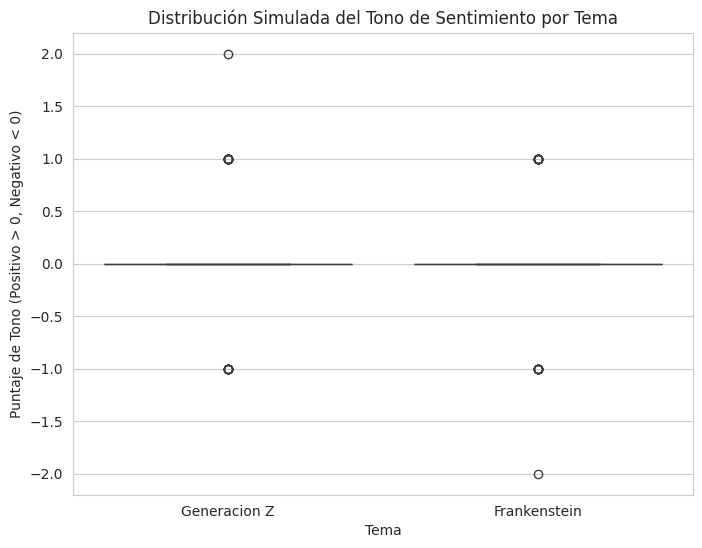


--- Tono Promedio y Desviación Estándar por Tema ---
              mean       std
Categoria                   
Frankenstein  0.00  0.492366
Generacion Z  0.08  0.506124


In [13]:
# Celda 7 (REVISADA Y MEJORADA)

# Re-definir diccionarios (puedes añadir más sinónimos si lo deseas)
sentimiento_genz = {
    'Positivo': ['esperanza', 'cambio', 'unidos', 'apoyo', 'futuro', 'despierta'],
    'Negativo': ['represion', 'violencia', 'detenidos', 'inseguridad', 'vandalismo', 'abusos'] # Sin tildes para evitar problemas
}

sentimiento_frank = {
    'Positivo': ['obra maestra', 'emocion', 'oscar', 'aplausos', 'genio', 'increible', 'joya', 'adoracion'],
    'Negativo': ['oscura', 'tragedia', 'dolor', 'miedo', 'controversia', 'tortuoso', 'nihilista', 'abandono']
}

def calcular_tono(texto, diccionario):
    """Calcula un puntaje de tono basado en la presencia de frases clave."""
    if pd.isna(texto):
        return 0
    
    # 1. Limpieza: Remover puntuación (excepto espacios) y convertir a minúsculas
    texto_limpio = re.sub(r'[^\w\s]', '', str(texto).lower())
    
    puntaje = 0
    # 2. Iterar sobre las palabras positivas y usar .count() para contarlas
    for palabra in diccionario['Positivo']:
        puntaje += texto_limpio.count(palabra)
        
    # 3. Iterar sobre las palabras negativas y restar el conteo
    for palabra in diccionario['Negativo']:
        puntaje -= texto_limpio.count(palabra)
        
    return puntaje

# 2. Aplicar la función a las categorías (EL CÓDIGO DE APLICACIÓN ES CORRECTO)
df['Tono_Sentimiento'] = 0

# Generacion Z
mask_genz = df['Categoria'] == 'Generacion Z'
df.loc[mask_genz, 'Tono_Sentimiento'] = (
    df.loc[mask_genz, 'Resumen'].astype(str) + ' ' + df.loc[mask_genz, 'Comentario_Reaccion'].astype(str)
).apply(lambda x: calcular_tono(x, sentimiento_genz))

# Frankenstein
mask_frank = df['Categoria'] == 'Frankenstein'
df.loc[mask_frank, 'Tono_Sentimiento'] = (
    df.loc[mask_frank, 'Resumen'].astype(str) + ' ' + df.loc[mask_frank, 'Comentario_Reaccion'].astype(str)
).apply(lambda x: calcular_tono(x, sentimiento_frank))

# 3. Visualización y Resumen (Continúa igual)


# 3. Visualización del Tono por Categoría 
plt.figure(figsize=(8, 6))
sns.boxplot(x='Categoria', y='Tono_Sentimiento', data=df)
plt.title('Distribución Simulada del Tono de Sentimiento por Tema')
plt.xlabel('Tema')
plt.ylabel('Puntaje de Tono (Positivo > 0, Negativo < 0)')
plt.show()

# Resumen numérico del tono
print("\n--- Tono Promedio y Desviación Estándar por Tema ---")
print(df.groupby('Categoria')['Tono_Sentimiento'].agg(['mean', 'std']))


--- Tono Promedio de Frankenstein al Mencionar al Director ---
      Menciona_Director  Tono_Sentimiento
0  No Menciona Director             0.025
1     Menciona Director            -0.100


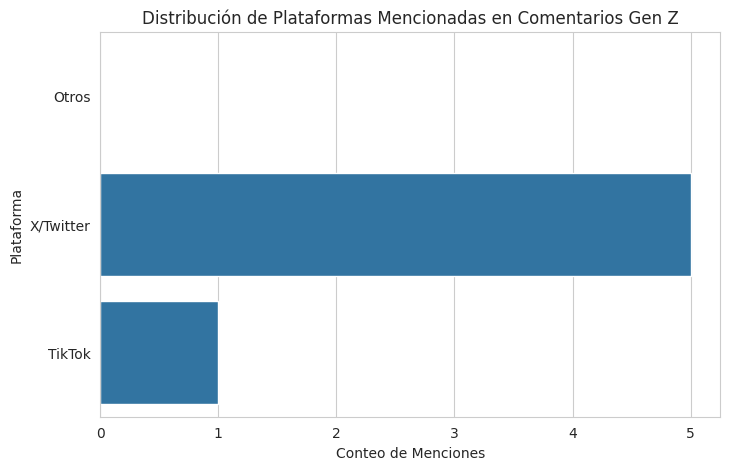

In [15]:
# Celda 8: Cruce de datos (CORREGIDA)

# ----------------------------------------------------
# ----------------------------------------------------
df_genz = df[df['Categoria'] == 'Generacion Z'].copy() 
df_frank_copy = df[df['Categoria'] == 'Frankenstein'].copy()

# ----------------------------------------------------
# 2. Influencia del Director en el Tono de Frankenstein
# ----------------------------------------------------
df_frank_copy['Menciona_Director'] = df_frank_copy['Comentario_Reaccion'].str.contains('Del Toro|GDT', case=False, na=False)

tono_por_mencion = df_frank_copy.groupby('Menciona_Director')['Tono_Sentimiento'].mean().reset_index()
tono_por_mencion['Menciona_Director'] = tono_por_mencion['Menciona_Director'].replace({True: 'Menciona Director', False: 'No Menciona Director'})

print("\n--- Tono Promedio de Frankenstein al Mencionar al Director ---")
print(tono_por_mencion)

# ----------------------------------------------------
# 3. Plataformas Sociales Mencionadas en Registros Gen Z
# ----------------------------------------------------
df_genz['Menciona_Plataforma'] = 'Otros'
df_genz.loc[df_genz['Comentario_Reaccion'].str.contains('TikTok', case=False, na=False), 'Menciona_Plataforma'] = 'TikTok'
df_genz.loc[df_genz['Comentario_Reaccion'].str.contains('Twitter|X', case=False, na=False), 'Menciona_Plataforma'] = 'X/Twitter'
df_genz.loc[df_genz['Comentario_Reaccion'].str.contains('Instagram', case=False, na=False), 'Menciona_Plataforma'] = 'Instagram'

plt.figure(figsize=(8, 5))
sns.countplot(y='Menciona_Plataforma', data=df_genz[df_genz['Menciona_Plataforma'] != 'Otros'], order=df_genz['Menciona_Plataforma'].value_counts().index)
plt.title('Distribución de Plataformas Mencionadas en Comentarios Gen Z')
plt.xlabel('Conteo de Menciones')
plt.ylabel('Plataforma')
plt.show()